# Chapter 6 偏微分方程组
## 抛物型偏微分方程
* 形如：
$$
[\partial_t-\lambda*(\partial_x^2+\partial_y^2+\partial_z^2)]\psi(x,y,z,t)=S(x,y,z,t)
$$
* 初始条件
  
只需要一个初始条件就可以算。

但一般会有边界约束。
### instance: Heat conduction equation
1. equation
$$
\begin{cases}
u_t=\lambda u_{xx}+q(x,t)\\
u(x=0,t)=0,u(x=l,t)=0\\
u(x,t=0)=\psi(x)
\end{cases}
$$
2. 迭代关系:

显性：同时不同位置推下一个时刻。

隐性：基于线性改进，时间是也有变动

平均：二者做平均。优点是对任意步长恒稳定

至于迭代法和松弛法，则是对位置对做相同的操作。具体可能是拉普拉斯的利用。

* 显性迭代关系

稳定条件 $r=\frac{\lambda\Delta t}{(\Delta x)^2}\in[0,\frac{1}{2}]$
$$
\begin{cases}
u_t\approx\frac{u(x,t+\Delta t)-u(x,t)}{\Delta t}\\
u_{xx}\approx\frac{\frac{u(x+\Delta x,t)-u(x,t)}{\Delta x}-\frac{u(x,t)-u(x-\Delta x,t)}{\Delta x}}{\Delta x}=\frac{u(x+\Delta x,t)-2u(x,t)+u(x-\Delta x,t)}{(\Delta x)^2}\\
\therefore u(x,t+\Delta t)\approx u(x,t)+\frac{\lambda\Delta t}{(\Delta x)^2}[u(x+\Delta x,t)-2u(x,t)+u(x-\Delta x,t)]+\Delta t *S\\
\end{cases}
$$
3. Error analysis

The Truncation error is $(\Delta t,\Delta x^2)$ 

4. 附加条件

注意她加了一个高斯热源。

### The way to conputation
#### classic solution first order approximation

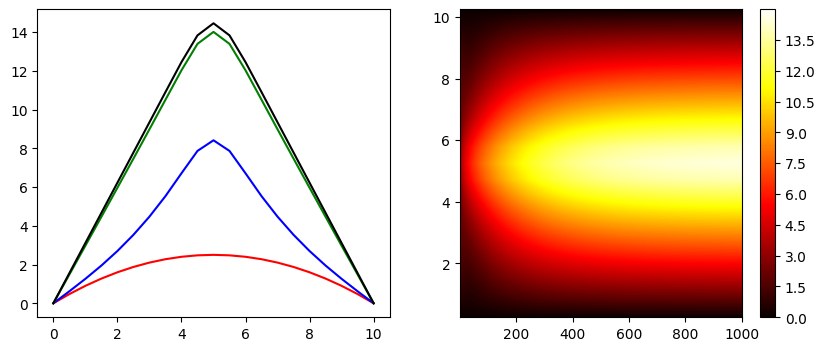

In [24]:
# Library
import numpy as np
import pylab as pl

# Variable
## step
tau=0.05
h=0.5
lamda=1
A=lamda*tau/h**2
l=10
NT=1000
NX=int(l/h)
u=np.zeros([NX+1,NT+1])
t=np.arange(0,NT,1)
x=np.arange(0,(NX+1)*h,h) #x多取是因为u多取了。

## condition
### t=0初始条件，注意不在杆上的点没有参与计算。
for i in range(0,NX): 
    u[i,0]=0.1*i*h*(10-i*h)
### integral and boundary condition
for t in range(NT): #外层时间循环
    for i in range(1,NX): #内层位置循环，以三个位置导出下一时刻U的值.注意她一直没有修改两端的0值。
        u[i,t+1]=A*u[i+1,t]+(1-2*A)*u[i,t]+A*u[i-1,t]+tau*5*np.exp(-2*(i*h-5)**2)
    u[0,t]=0
    u[NX,t]=0 #这个右端点不在杆上
    
# plot
## linear
fig=pl.figure(figsize=(10,4))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

ax1.plot(x,u[:,0],'r-')
ax1.plot(x,u[:,100],'b-')
ax1.plot(x,u[:,600],'g-')
ax1.plot(x,u[:,1000],'k-')
## contourf
extent=[0,NT+1,0,(NX+1)*h]
levels=np.arange(0,15,0.01)
cs=ax2.contourf(u,levels,origin='lower',extent=extent,cmap=pl.cm.hot)
cbar=fig.colorbar(cs)
pl.show()

#### General solution
抛物线型可以用OED的迭代，但效果一般，只有时间用了一点点高级近似

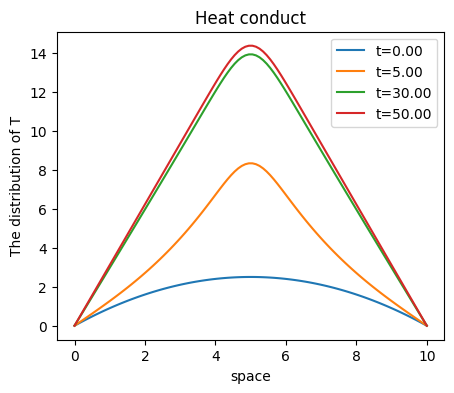

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# 定义热传导方程,左边是一阶导数，输出其他。
def heat_equation(t, u, lamda, dx):
    ## 设置边界条件
    u[0] = 0
    u[-1] = 0
    ## 添加热源
    heat_source = 5 * np.exp(-2*(dx - 5)**2)
    ## 时间梯度
    partialx2_u = np.gradient(np.gradient(u, dx), dx)
    return lamda * partialx2_u+heat_source #单次输出为定态向量

# 定义空间网格（一维）
space_grid = np.linspace(0, 10, 100)
# 定义初始条件for t=0.
initial_condition = 0.1*space_grid*(10-space_grid)
#initial_condition = np.sin(space_grid )

# 求解热传导方程
solution = solve_ivp(heat_equation, [0, 50], initial_condition, args=(1, space_grid), method='Radau',t_eval=[0, 5, 30, 50])
#[0,0.1]是x2或者说t的范围
#t_eval只是.t和.y的一个标记。即她算了，但你不一定都要

# 绘制温度分布随时间的演化
plt.figure(figsize=(5,4 ))
for i in range(len(solution.t)):
    plt.plot(space_grid, solution.y[:, i], label=f't={solution.t[i]:.2f}')
plt.xlabel('space')
plt.ylabel("The distribution of T")
plt.title('Heat conduct')
plt.legend()
plt.show()


### Instance: Second order heat conduct
#### Classic solution

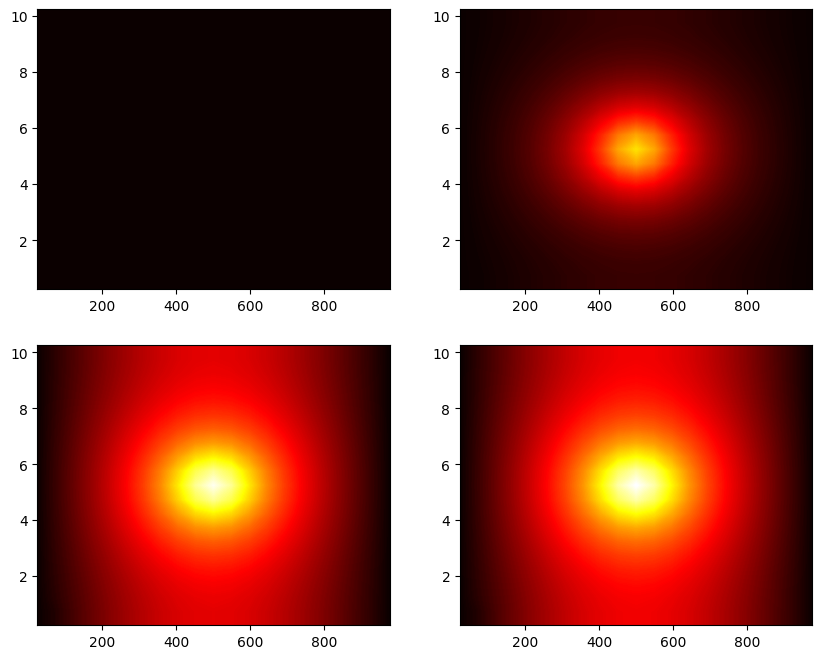

In [8]:
# Library
import numpy as np
import pylab as pl

# Variable
## range
l=10
timerange=50
NX=20
NY=20
NT=1000
u=np.zeros([NX+1,NY+1,NT+1])
## step
tau=timerange/NT
h=l/NX
lamda=1
A=lamda*tau/h**2

# integral and condition
## 初始条件
u[:,:,0]=0
## integral
for t in range(NT): #外层时间循环
    for i in range(1,NX): #内层位置循环，注意她一直没有修改第一类边界。
        for j in range(1,NX): 
            u[i,j,t+1]=(1-4*tau*lamda/h**2)*u[i,j,t]+tau*lamda/h**2*(u[i-1,j,t]+\
            u[i,j-1,t]+u[i+1,j,t]+u[i,j+1,t])+tau*5*np.exp(-2*(i*h-5)**2+-2*(j*h-5)**2)
            ### boundary
            #### 边界恒温
            #### y方向绝热
            u[0,:,t]=u[1,:,t]
            u[NY,:,t]=u[NY-1,:,t] 

# plot
## linear
fig=pl.figure(figsize=(10,8))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

## contourf
extent=[0,NT+1,0,(NX+1)*h]
levels=np.arange(0,np.max(u),0.01)
cs=ax1.contourf(u[:,:,0],levels,origin='lower',extent=extent,cmap=pl.cm.hot)
cs=ax2.contourf(u[:,:,100],levels,origin='lower',extent=extent,cmap=pl.cm.hot)
cs=ax3.contourf(u[:,:,600],levels,origin='lower',extent=extent,cmap=pl.cm.hot)
cs=ax4.contourf(u[:,:,999],levels,origin='lower',extent=extent,cmap=pl.cm.hot)
pl.show()


## 双曲型偏微分方程
* 形如
$$
\partial_t^2-a^2(\partial_x^2+\partial_y^2+\partial_z^2)\varphi(x,y,t)=S(x,y,z,t)
$$
* 初始条件

需要两个初始条件，即一阶导数和原函数的初始分布，因为我们需要对 $0+\Delta t$ 的函数有所知。边界条件随便。

一个最简单也是最常见的第二类初始条件的转化其实就是一阶向后差分。。。


## 椭圆形：
即泊松方程
* 形如
$$
u_{xx}+u_{yy}+u_{zz}=S(x,y,z)
$$
* Original condition

It is not essential for a original condition, yet we always need boundary condition for unusual solution.Evidently one dim we need 2 conditions, two dims we need 4 conditons...


## Unusual function of partial fuction
```python
import scipy.special as sps
```
### 艾里函数
```python
sps.airy()
```
### 贝塞尔方程
此方程通解有三种表示
$$
y=\begin{cases}
C_1J_\upsilon(z)+C_2J_{-\upsilon}(z)\quad\upsilon\neq\mathbb{Z}\\
C_1J_\upsilon(z)+C_2N_{\upsilon}(z)\\
C_1H^{(1)}_\upsilon(z)+C_2H^{(2)}_{\upsilon}(z)\\
\end{cases}
$$
* 第一类贝塞尔函数一个
```python
sps.jv(upsilon,z)
```
* 第二类贝塞尔函数一个（诺伊曼）
```python
sps.yv(upsilon,z)
```
* 第三类贝塞尔函数两个（汉克尔）
```python
sps.hankel1(v,z)
sps.hankel2(v,z)
```
### 连带勒让德函数
注意这里sps里面的函数与数学上不完全相同
$$
lpmv=(-1)^mP_l^m(x)
$$
```python
sps.lpmv(m,l,x)
```

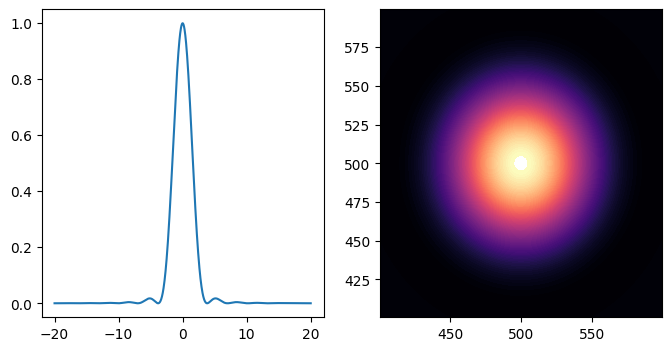

In [11]:
import scipy.special as sps
import numpy as np
import matplotlib.pyplot as plt
# Data
## Dim1
I0=1
x=np.linspace(-20,20,1000)
y=sps.jv(1,x)
I=I0*(2*y/x)**2
## Dim2
x=np.linspace(-20,20,1000)
y=np.linspace(-20,20,1000)
gradx,grady=np.meshgrid(x,y)
r=np.sqrt(gradx**2+grady**2)
z=sps.jv(1,r)
z=I0*(2*z/r)**2

# Plot
## Dim1
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.plot(x,I)
## Dim2
extent1=[400,600,400,600]
levels=np.arange(0,np.max(z),0.01)
cs=ax2.contourf(z[400:600,400:600],levels,origin='lower',cmap='magma',extent=extent1)